In [9]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset
import os
from env import host, password, user 
import acquire

# Apply the scalers we talked about in this lesson to your data and visualize the results. Use the telco data set.

In [10]:
df = acquire.wrangle_telco()
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [11]:
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)
train.shape, test.shape, validate.shape

((1084, 4), (339, 4), (272, 4))

In [12]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[['total_charges']])

train['total_charges_scaled'] = scaler.transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.transform(validate[['total_charges']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

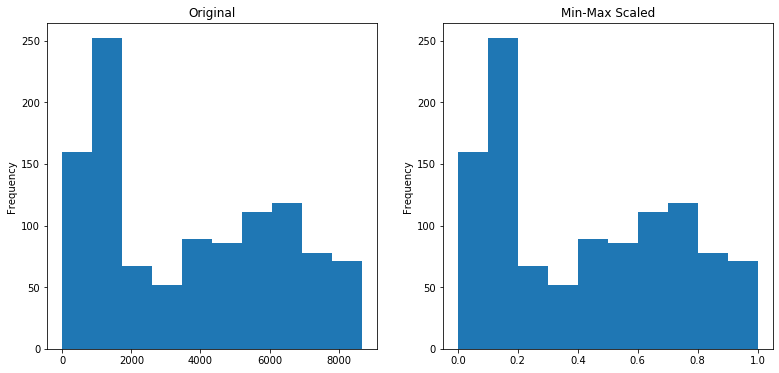

In [13]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Min-Max Scaled')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

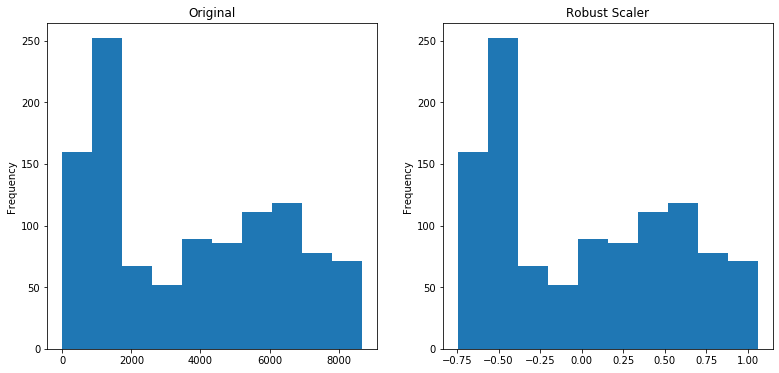

In [14]:
# Robust Scaler
scaler = sklearn.preprocessing.RobustScaler()

scaler.fit(train[['total_charges']])

train['total_charges_scaled'] = scaler.transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.transform(validate[['total_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Robust Scaler')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

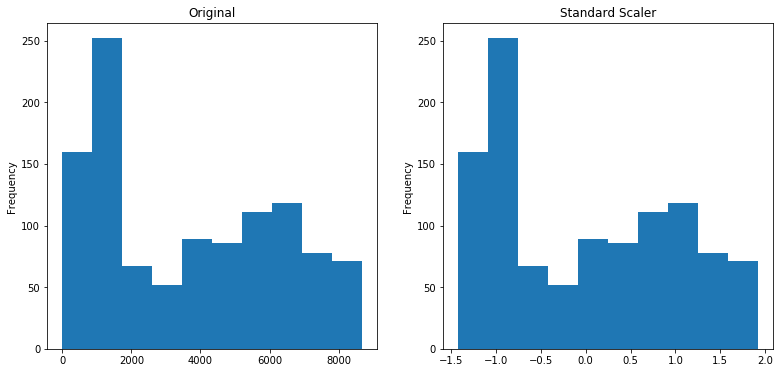

In [15]:
scaler = sklearn.preprocessing.StandardScaler()

scaler.fit(train[['total_charges']])

train['total_charges_scaled'] = scaler.transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.transform(validate[['total_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Standard Scaler')

In [16]:
### Wrap it all up in a function, as shown in the exercise walkthrough ###
def visualize_scaler(scaler, scaler_name):
    monthly_charges_scaled = scaler.fit_transform(train[['monthly_charges']])
    fig = plt.figure(figsize=(12, 10))
    gs = plt.GridSpec(2, 2) # subplot with a 2x2 grid
    ax1 = fig.add_subplot(gs[0, :]) # the first row, all the columns
    ax2 = fig.add_subplot(gs[1, 0]) # second row, first column
    ax3 = fig.add_subplot(gs[1, 1]) # second row, second column
    
    ax1.scatter(train.monthly_charges, monthly_charges_scaled)
    ax1.set(xlabel='monthly_charges', ylabel='monthly_charges_scaled', title=scaler_name)
    ax2.hist(train.monthly_charges)
    ax2.set(title='Original')
    ax3.hist(monthly_charges_scaled)
    ax3.set(title='Scaled')
    
    visualize_scaler(sklearn.preprocessing.MinMaxScaler(), 'Min-Max Scaling')

In [17]:
### Walkthru ###
def visualize_scaler(scaler, scaler_name):
    monthly_charges_scaled = scaler.fit_transform(train[['monthly_charges']])
    fig = plt.figure(figsize=(12, 10))
    gs = plt.GridSpec(2, 2) # subplot with a 2x2 grid
    ax1 = fig.add_subplot(gs[0, :]) # the first row, all the columns
    ax2 = fig.add_subplot(gs[1, 0]) # second row, first column
    ax3 = fig.add_subplot(gs[1, 1]) # second row, second column
    
    ax1.scatter(train.monthly_charges, monthly_charges_scaled)
    ax1.set(xlabel='monthly_charges', ylabel='monthly_charges_scaled', title=scaler_name)
    ax2.hist(train.monthly_charges)
    ax2.set(title='Original')
    ax3.hist(monthly_charges_scaled)
    ax3.set(title='Scaled')

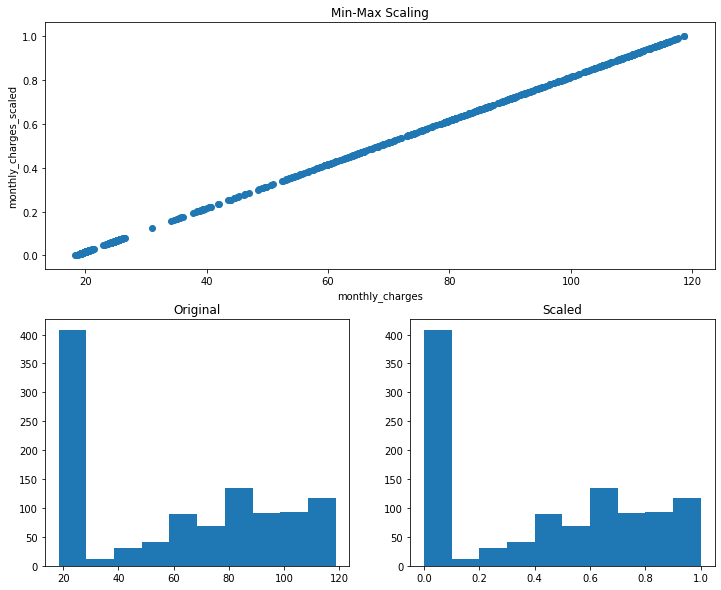

In [18]:
visualize_scaler(sklearn.preprocessing.MinMaxScaler(), 'Min-Max Scaling')

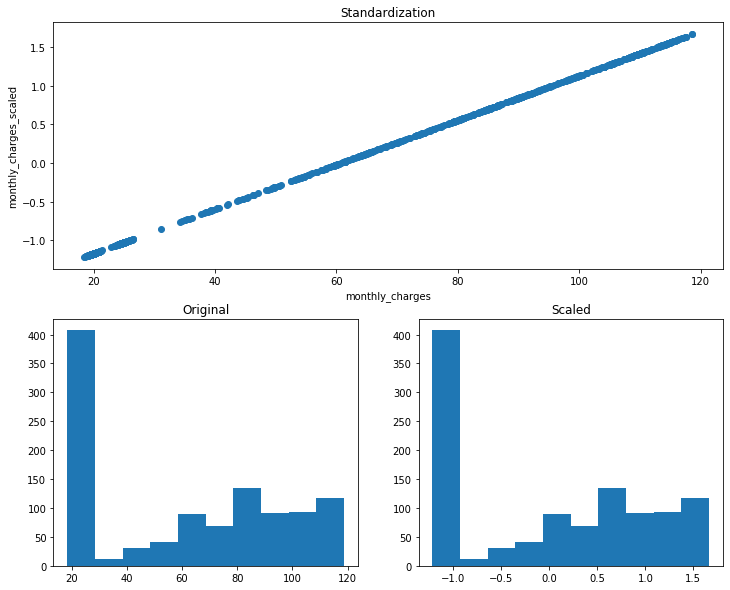

In [19]:
visualize_scaler(sklearn.preprocessing.StandardScaler(), 'Standardization')

# Inverse_Transform

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

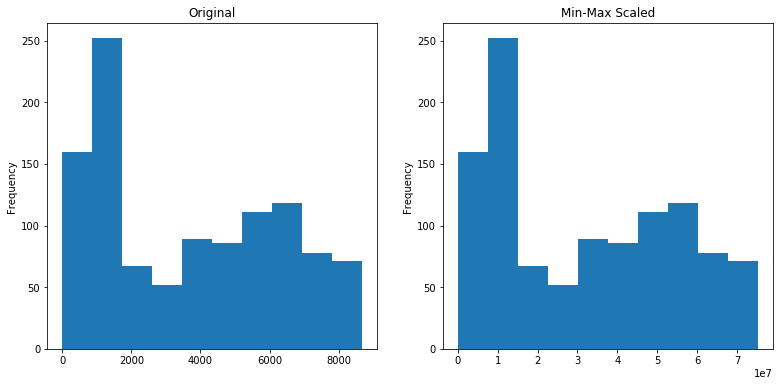

In [20]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[['total_charges']])

train['total_charges_scaled'] = scaler.inverse_transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.inverse_transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.inverse_transform(validate[['total_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Min-Max Scaled')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

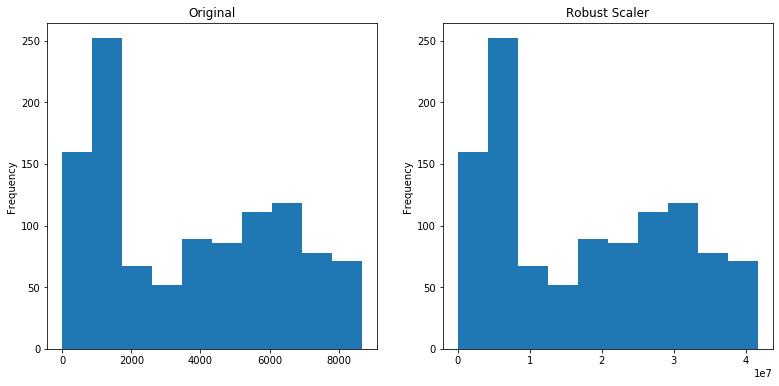

In [21]:
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(train[['total_charges']])

train['total_charges_scaled'] = scaler.inverse_transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.inverse_transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.inverse_transform(validate[['total_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Robust Scaler')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

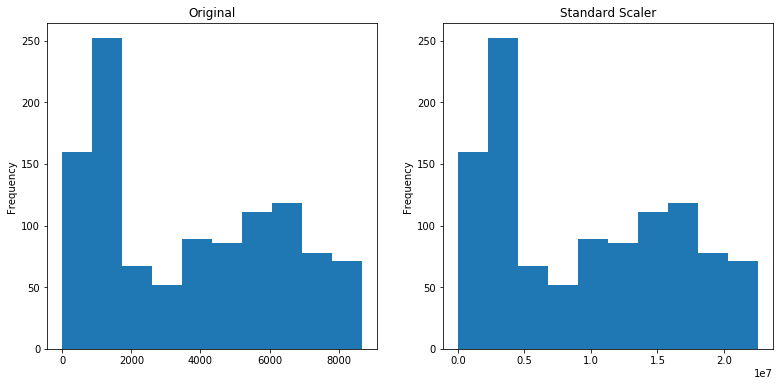

In [22]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train[['total_charges']])

train['total_charges_scaled'] = scaler.inverse_transform(train[['total_charges']])
test['total_charges_scaled'] = scaler.inverse_transform(test[['total_charges']])
validate['total_charges_scaled'] = scaler.inverse_transform(validate[['total_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
train.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges_scaled.plot.hist(title='Standard Scaler')

# Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [23]:
sklearn.preprocessing.QuantileTransformer?

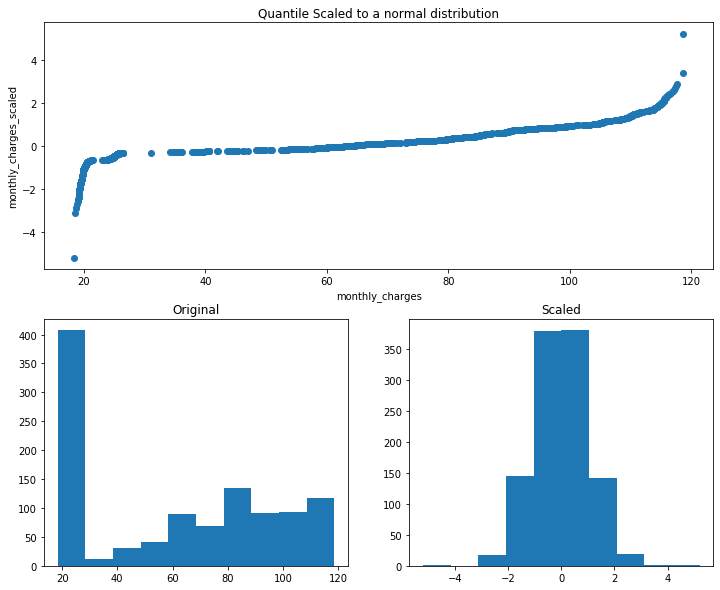

In [24]:
### Walkthru ###

visualize_scaler(
    sklearn.preprocessing.QuantileTransformer(output_distribution='normal'),
    'Quantile Scaled to a normal distribution',
)

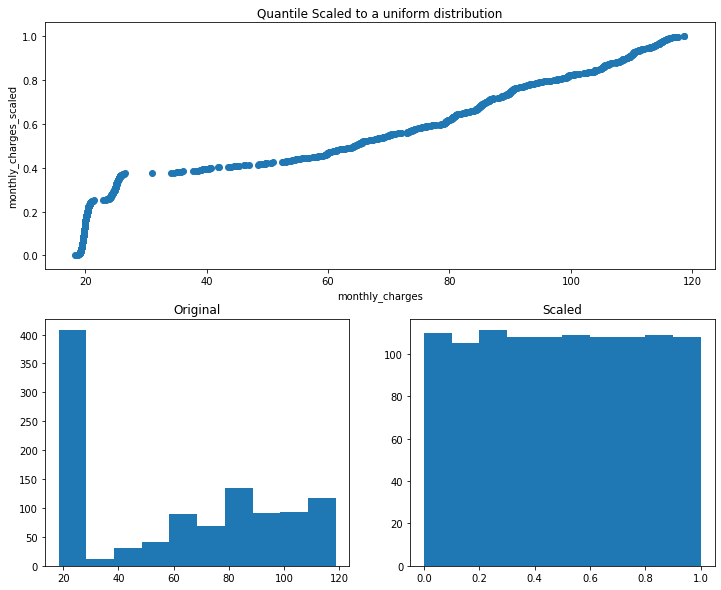

In [29]:
visualize_scaler(
    sklearn.preprocessing.QuantileTransformer(output_distribution='uniform'),
    'Quantile Scaled to a uniform distribution',
)

In [26]:
monthly_charges = pd.Series([33.99, 23.99, 49.99, 12.99, 79.99])
example_df = pd.DataFrame(dict(monthly_charges=monthly_charges))
example_df['rank'] = example_df.monthly_charges.rank()
example_df.sort_values(by='monthly_charges')

,monthly_charges,rank
3,12.99,1.0
1,23.99,2.0
0,33.99,3.0
2,49.99,4.0
4,79.99,5.0


4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

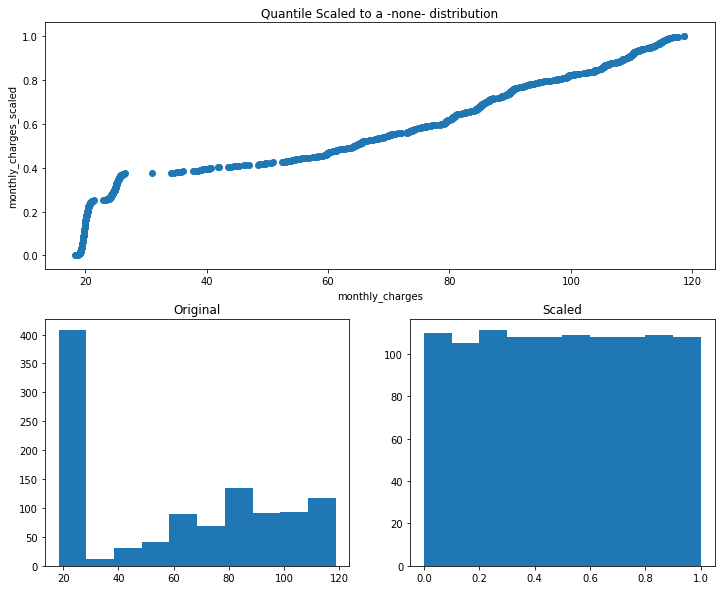

In [30]:
visualize_scaler(
    sklearn.preprocessing.QuantileTransformer(),
    'Quantile Scaled to a -none- distribution',)

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [31]:
def scale_telco_data(train, test, validate):
    train, validate, test = add_scaled_columns(
        train,
        test,
        validate,
        scaler=sklearn.preprocessing.MinMaxScaler(),
        columns_to_scale=['total_charges', 'monthly_charges', 'tenure'],
    )
    return train, validate, test